# Postdam PM2.5 Linear Regression Forcasting 

* With Ridge And Lasso Regression Models
* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [ ]:
# imports
import os
import pandas as pd
os.chdir('..')
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
# from src.linear_regression import decompose_time_series
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import Lasso
from scipy.stats import loguniform

In [2]:
df = pd.read_csv('data/CLEAN_MERGED_DE_DEBB021.csv')
df.head()

,Start_Timestamp,End_Timestamp,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,1356998400,1357002000,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1,1357002000,1357005600,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2,1357005600,1357009200,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
3,1357009200,1357012800,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
4,1357012800,1357016400,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Start_Timestamp,87648.0,1.514763e+09,9.108699e+07,1.356998e+09,1.435881e+09,1.514763e+09,1.593645e+09,1.672528e+09
End_Timestamp,87648.0,1.514767e+09,9.108699e+07,1.357002e+09,1.435884e+09,1.514767e+09,1.593649e+09,1.672531e+09
PM2.5-Pollutant,87648.0,6.001000e+03,0.000000e+00,6.001000e+03,6.001000e+03,6.001000e+03,6.001000e+03,6.001000e+03
PM2.5-Value,87648.0,1.303341e+01,1.018415e+01,7.700000e-01,6.000000e+00,1.003000e+01,1.700000e+01,1.940000e+02
PM2.5-Validity,87648.0,1.005545e+00,1.495142e-01,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
PM2.5-Verification,87648.0,1.000011e+00,3.377762e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
PM10-Pollutant,87648.0,5.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
PM10-Value,87648.0,1.786535e+01,1.249411e+01,8.000000e-01,9.300000e+00,1.491000e+01,2.320000e+01,7.053000e+02
PM10-Validity,87648.0,9.974557e-01,1.234824e-01,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
PM10-Verification,87648.0,1.000011e+00,3.377762e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [4]:
df.set_index('Start_Timestamp', inplace=True)
df.head()

,End_Timestamp,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,PM10-Validity,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start_Timestamp,,,,,,,,,,,,,,,,,,,,,
1356998400,1357002000,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,1,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1357002000,1357005600,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,1,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
1357005600,1357009200,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,1,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357009200,1357012800,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,1,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357012800,1357016400,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,1,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


# Linear Regression 

* Defining Target and feature variables
* Scale Features
* Apply PCA
* Split Data into Train, Validation, Test data
* Train Linear Reg Model
* Predict
* Evaluate Validation and Test data
* Hyperparameter Tuning ??


In [5]:
# Defining Target and feature variables
features = ['NO2-Value', 'O3-Value', 'SO2-Value', 'PM10-Value']
target = 'PM2.5-Value'

# Separate the features and target
X = df[features]
y = df[target]

## Splitting Data 

Train, Validation and Test data

In [6]:
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# Calculate the indices for the splits
train_end = int(len(df) * train_ratio)
validation_end = train_end + int(len(df) * validation_ratio)

# Split the dataset
train_data = df[:train_end]
validation_data = df[train_end:validation_end]
test_data = df[validation_end:]


print(f"Training set size: {train_data.shape[0]}")
print(f"Validation set size: {validation_data.shape[0]}")
print(f"Test set size: {test_data.shape[0]}")


Training set size: 52588
Validation set size: 17529
Test set size: 17531


In [7]:
# Scale the features
scaler = StandardScaler()
scaler.fit(train_data[features])  # Fit only on training data

# Scale the datasets
X_train_scaled = scaler.transform(train_data[features])
X_val_scaled = scaler.transform(validation_data[features])
X_test_scaled = scaler.transform(test_data[features])

## Principle Component Analysis (PCA)
Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

In [8]:
# Apply PCA on the scaled data
pca = PCA(n_components=0.95)  # Adjust based on the explained variance
pca.fit(X_train_scaled)  # Fit only on training data

PCA(n_components=0.95)

In [9]:
# Transform the datasets using the fitted PCA
X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [10]:
# Extract the target variable
y_train = train_data[target]
y_val = validation_data[target]
y_test = test_data[target]

## Model Creation
* Initialize Linear Regression Model
* Train model

In [11]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

# Evaluation 

## With Validation Data

Error metrics MAE, MSE, RMSE, MASE, MAPE

* Regarding the MASE metric, calculating it requires a baseline prediction model for the time series, which is typically done by using the last observed value to predict the next (in the simplest case) or using more complex methods like ARIMA for one-step ahead forecasting. This is not included in the above script as it would require additional steps to implement the naive forecasting method for a time series.

### Predict Validation


In [12]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val_pca)

print(y_val_pred)


[10.65613175  9.00218368  8.49414407 ...  9.74688202 10.15845453
 10.05854868]


In [13]:
# Error Metric
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mse_val ** 0.5
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Validation MAE: {mae_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAPE: {mape_val}")

Validation MAE: 2.292658414081227
Validation MSE: 12.682201234335716
Validation RMSE: 3.5612078336339366
Validation MAPE: 0.34257559632458234


In [14]:
# MASE Calculation

# Create naive forecasts for validation and test sets
y_val_naive = np.roll(y_val, 1)

# Calculate MAE for the naive forecasts
mae_val_naive = mean_absolute_error(y_val[1:], y_val_naive[1:])

# Calculate MASE for validation and test sets
mase_val = mae_val / mae_val_naive

print(f"Validation MASE: {mase_val}")

Validation MASE: 2.2119725489718594


## With Test Data


In [15]:
# Predict on the test set
y_test_pred = model.predict(X_test_pca)

# Calculate and print the test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"\nTest MAE: {mae_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAPE: {mape_test}")


Test MAE: 2.3550629865865025
Test MSE: 10.816335411930067
Test RMSE: 3.288819759720813
Test MAPE: 0.323103721697535


In [16]:
# MASE Calculation

# Create naive forecasts for validation and test sets
y_test_naive = np.roll(y_test, 1)

# Calculate MAE for the naive forecasts
mae_test_naive = mean_absolute_error(y_test[1:], y_test_naive[1:])

# Calculate MASE for validation and test sets
mase_test = mae_test / mae_test_naive

print(f"Test MASE: {mase_test}")

Test MASE: 2.1803572595098566


## Plot Table 


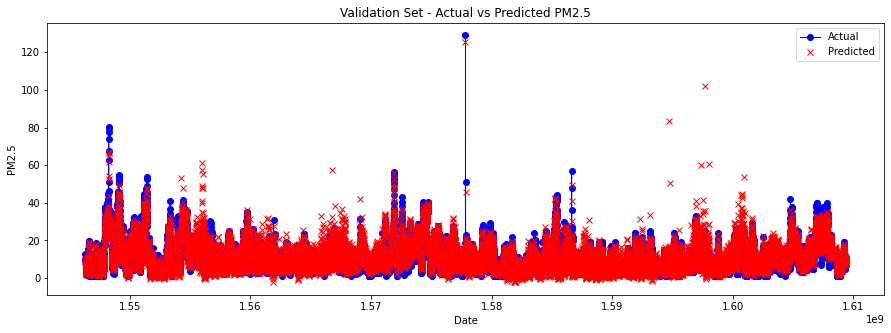

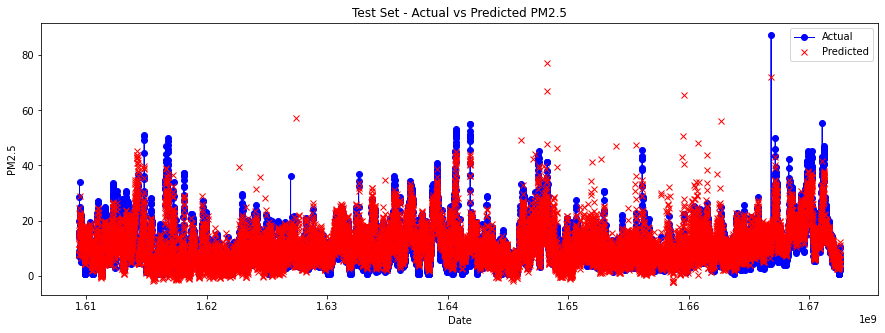

In [17]:

# Let's assume y_val is your validation set actual values and y_val_pred are the predictions
# Similarly, y_test and y_test_pred for the test set

# Plotting the actual vs predicted values for validation set
plt.figure(figsize=(15, 5))

# Actual values - using blue color with a line marker
plt.plot(validation_data.index, y_val, color='blue', marker='o', label='Actual', linestyle='-', linewidth=1)

# Predicted values - using red color with a cross marker
plt.plot(validation_data.index, y_val_pred, color='red', marker='x', label='Predicted', linestyle='None')

plt.title('Validation Set - Actual vs Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

# For the test set, do similarly
plt.figure(figsize=(15, 5))

# Actual values - using blue color with a line marker
plt.plot(test_data.index, y_test, color='blue', marker='o', label='Actual', linestyle='-', linewidth=1)

# Predicted values - using red color with a cross marker
plt.plot(test_data.index, y_test_pred, color='red', marker='x', label='Predicted', linestyle='None')

plt.title('Test Set - Actual vs Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

# HyperPramater Tuning

Linear Regression typically has fewer hyperparameters than other models like neural networks or ensemble models. However, there are still some aspects of the model that you can adjust. For instance, you can apply regularization, which can be considered a form of hyperparameter tuning. The most common types of regularized linear regression are Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization).

## Ridge Regression (L2)
Ridge regression, also known as Tikhonov regularization, is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated. In multicollinear data, least-squares estimates are unbiased, but their variances are large, so they may be far from the true value. Ridge regression adds a degree of bias to the regression estimates, which often results in a decrease in the standard errors.

* RandomizedSearchCV is a useful alternative to GridSearchCV when the parameter space is large. It samples a fixed number of parameter combinations from the specified distributions, which can be much more efficient, especially when some hyperparameters do not influence the performance of the model significantly.


### Model Creation

In [18]:
# Define the model
model = Ridge()


In [19]:
# Define the distribution of hyperparameters to sample from
# Here, we define a uniform distribution over a log scale for the alpha parameter
param_distributions = {'alpha': uniform(1e-4, 1e4)}

# Set up the random search with cross-validation
# n_iter sets the number of different combinations to try
# cv is the number of folds for cross-validation
# scoring determines the metric used to evaluate the models
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=100, cv=5, scoring='neg_mean_absolute_error', verbose=1, random_state=42, n_jobs=-1)

### Model Train

In [20]:
# Fit the random search to the data (use the PCA-transformed data)
random_search.fit(X_train_pca, y_train)

# Print the best parameters
print('Best parameters found: ', random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'alpha': 55.221271236023995}


In [21]:
# Use the best estimator to make predictions
y_val_pred = random_search.best_estimator_.predict(X_val_pca)
y_test_pred = random_search.best_estimator_.predict(X_test_pca)

In [22]:
# Validation Set

# Error Metric
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mse_val ** 0.5
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Validation MAE: {mae_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAPE: {mape_val}")

# MASE Calculation

# Create naive forecasts for validation and test sets
y_val_naive = np.roll(y_val, 1)

# Calculate MAE for the naive forecasts
mae_val_naive = mean_absolute_error(y_val[1:], y_val_naive[1:])

# Calculate MASE for validation and test sets
mase_val = mae_val / mae_val_naive

print(f"Validation MASE: {mase_val}")


Validation MAE: 2.293431307139641
Validation MSE: 12.679186090652053
Validation RMSE: 3.560784476860689
Validation MAPE: 0.34270005007218235
Validation MASE: 2.2127182414910775


In [23]:
# Test Set
# Calculate and print the test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"\nTest MAE: {mae_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAPE: {mape_test}")

# MASE Calculation

# Create naive forecasts for validation and test sets
y_test_naive = np.roll(y_test, 1)

# Calculate MAE for the naive forecasts
mae_test_naive = mean_absolute_error(y_test[1:], y_test_naive[1:])

# Calculate MASE for validation and test sets
mase_test = mae_test / mae_test_naive

print(f"Test MASE: {mase_test}")



Test MAE: 2.3552672304647606
Test MSE: 10.814413114014462
Test RMSE: 3.288527499355063
Test MAPE: 0.3231066784136696
Test MASE: 2.180546351956728


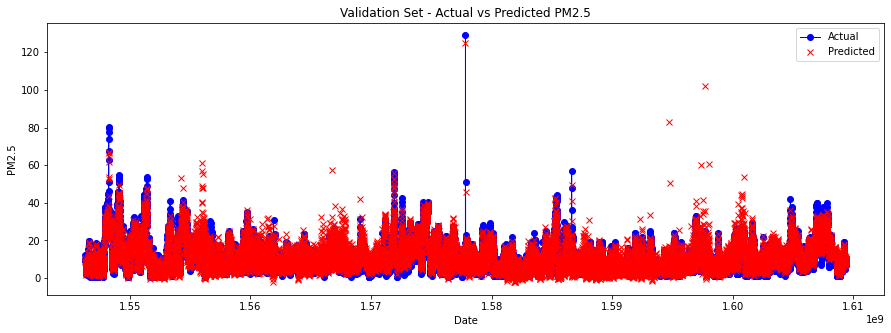

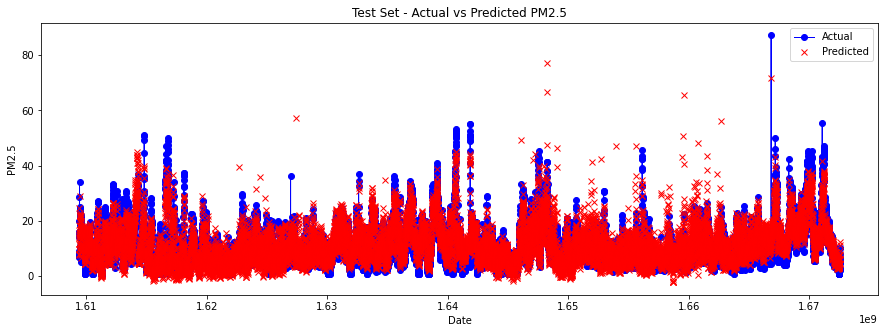

In [24]:

# Let's assume y_val is your validation set actual values and y_val_pred are the predictions
# Similarly, y_test and y_test_pred for the test set

# Plotting the actual vs predicted values for validation set
plt.figure(figsize=(15, 5))

# Actual values - using blue color with a line marker
plt.plot(validation_data.index, y_val, color='blue', marker='o', label='Actual', linestyle='-', linewidth=1)

# Predicted values - using red color with a cross marker
plt.plot(validation_data.index, y_val_pred, color='red', marker='x', label='Predicted', linestyle='None')

plt.title('Validation Set - Actual vs Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

# For the test set, do similarly
plt.figure(figsize=(15, 5))

# Actual values - using blue color with a line marker
plt.plot(test_data.index, y_test, color='blue', marker='o', label='Actual', linestyle='-', linewidth=1)

# Predicted values - using red color with a cross marker
plt.plot(test_data.index, y_test_pred, color='red', marker='x', label='Predicted', linestyle='None')

plt.title('Test Set - Actual vs Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

## Lasso Regression (L1)

Lasso regression, which stands for Least Absolute Shrinkage and Selection Operator, is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e., models with fewer parameters). This is particularly useful when you have a large number of predictors because it automatically performs variable selection.

The key difference between ridge regression and lasso regression lies in the penalty term added to the cost function. While ridge regression adds a squared magnitude of the coefficient as a penalty term to the cost function, lasso regression adds the absolute value of the magnitude of the coefficient as the penalty term.

The advantages of lasso regression include:

* It can produce simpler and more interpretable models due to feature selection.
* It is less prone to overfitting as it penalizes the absolute size of the coefficients.
* It can handle complex scenarios with many variables or features in the dataset.

However, lasso regression can also have disadvantages, such as biasing estimates towards zero and sometimes underperforming when all variables are included in the true model. It can also struggle with grouped variables, where it tends to select only one variable from a group and ignore the others.

### Model Creation


In [25]:
# Define the model
model = Lasso(max_iter=10000)  # Increased max_iter for convergence with high-dimensional data

# Define the distribution of hyperparameters to sample from
# loguniform is useful for alpha because it spans several orders of magnitude
param_distributions = {'alpha': loguniform(1e-4, 1e0)}

# Set up the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

### Model Training

In [26]:
# Fit the random search to the data (use the PCA-transformed data)
random_search.fit(X_train_pca, y_train)

# Print the best parameters
print('Best parameters found: ', random_search.best_params_)

# Use the best estimator to make predictions
y_val_pred = random_search.best_estimator_.predict(X_val_pca)
y_test_pred = random_search.best_estimator_.predict(X_test_pca)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'alpha': 0.00010521761868451127}


In [27]:
# Validation Set

# Error Metric
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mse_val ** 0.5
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Validation MAE: {mae_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAPE: {mape_val}")

# MASE Calculation

# Create naive forecasts for validation and test sets
y_val_naive = np.roll(y_val, 1)

# Calculate MAE for the naive forecasts
mae_val_naive = mean_absolute_error(y_val[1:], y_val_naive[1:])

# Calculate MASE for validation and test sets
mase_val = mae_val / mae_val_naive

print(f"Validation MASE: {mase_val}")

Validation MAE: 2.2926922590133145
Validation MSE: 12.682161316756021
Validation RMSE: 3.561202229129374
Validation MAPE: 0.3425817160270293
Validation MASE: 2.212005202794269


In [28]:
# Test Set
# Calculate and print the test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"\nTest MAE: {mae_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAPE: {mape_test}")

# MASE Calculation

# Create naive forecasts for validation and test sets
y_test_naive = np.roll(y_test, 1)

# Calculate MAE for the naive forecasts
mae_test_naive = mean_absolute_error(y_test[1:], y_test_naive[1:])

# Calculate MASE for validation and test sets
mase_test = mae_test / mae_test_naive

print(f"Test MASE: {mase_test}")



Test MAE: 2.3550875005151237
Test MSE: 10.816381817380325
Test RMSE: 3.2888268147441764
Test MAPE: 0.3231071872444607
Test MASE: 2.1803799549207787


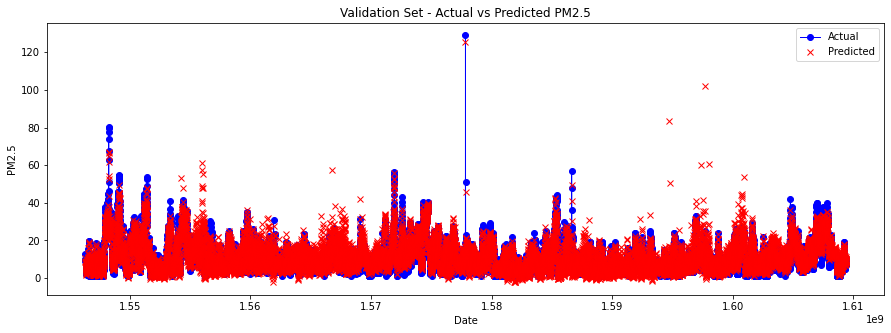

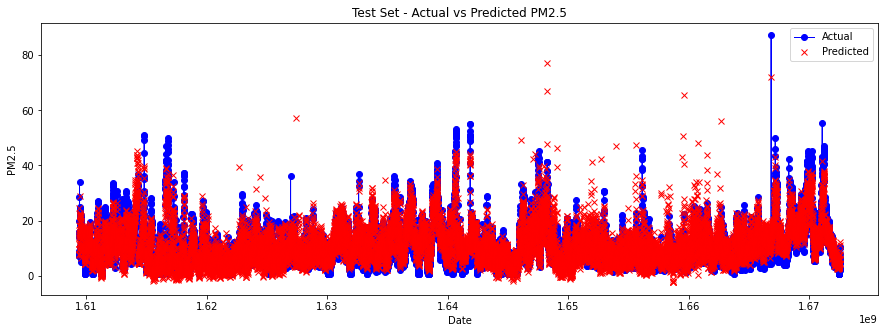

In [29]:
# Let's assume y_val is your validation set actual values and y_val_pred are the predictions
# Similarly, y_test and y_test_pred for the test set

# Plotting the actual vs predicted values for validation set
plt.figure(figsize=(15, 5))

# Actual values - using blue color with a line marker
plt.plot(validation_data.index, y_val, color='blue', marker='o', label='Actual', linestyle='-', linewidth=1)

# Predicted values - using red color with a cross marker
plt.plot(validation_data.index, y_val_pred, color='red', marker='x', label='Predicted', linestyle='None')

plt.title('Validation Set - Actual vs Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

# For the test set, do similarly
plt.figure(figsize=(15, 5))

# Actual values - using blue color with a line marker
plt.plot(test_data.index, y_test, color='blue', marker='o', label='Actual', linestyle='-', linewidth=1)

# Predicted values - using red color with a cross marker
plt.plot(test_data.index, y_test_pred, color='red', marker='x', label='Predicted', linestyle='None')

plt.title('Test Set - Actual vs Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()